#     Tutorial 35 - Image filtering in python - Non-local means (NLM) filter for image denoising
Apeer_micro
 www.youtube.com/watch?v=3-53P4zUkZQ&list=PLHae9ggVvqPgyRQQOtENr6hK0m1UquGaG&index=36


This tutorial explains the non-local means (NLM) filter and walks you through the process of writing a couple of lines NLM filter is especially recommended to denoise CT,  uCT, and MRI images.
 

In [18]:
import cv2
import numpy as np
from skimage import io, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
import getpass 
import matplotlib.pyplot as plt

In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\gilfm\Miniconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\gilfm\Minico

In [5]:
BASE_FOLDER = 'C:/Users/' + getpass.getuser() +'/Pictures/Saved Pictures/'
path1 = BASE_FOLDER + "Osteosarcoma_01_25Sigma_noise.tif"
path2 = BASE_FOLDER + "Osteosarcoma_01_8bit_salt_pepper.tif" 

In [9]:
img_gaussian_noise = img_as_float(io.imread(path1, as_gray=True))
img_salt_pepper_noise = img_as_float(io.imread(path2, as_gray=True))

img = img_gaussian_noise

In [10]:
sigma_est = np.mean(estimate_sigma(img, multichannel=True))
#sigma_est = 0.1

In [13]:
 denoise_img = denoise_nl_means(img, h=1.15 * sigma_est, 
    fast_mode=True, patch_size=5, patch_distance=3, multichannel=False)
 

<h3>
When the fast_mode argument is False, a spatial Gaussian weighting 
is applied  o the patches when computing patch distances. 

When fast_mode is True a  faster algorithm employing uniform spatial 
weighting on the patches is applied.

Larger h allows more smoothing between disimilar patches.

In [14]:
 cv2.imshow("Original", img)

In [15]:
 cv2.imshow("NLM Filtered", denoise_img)


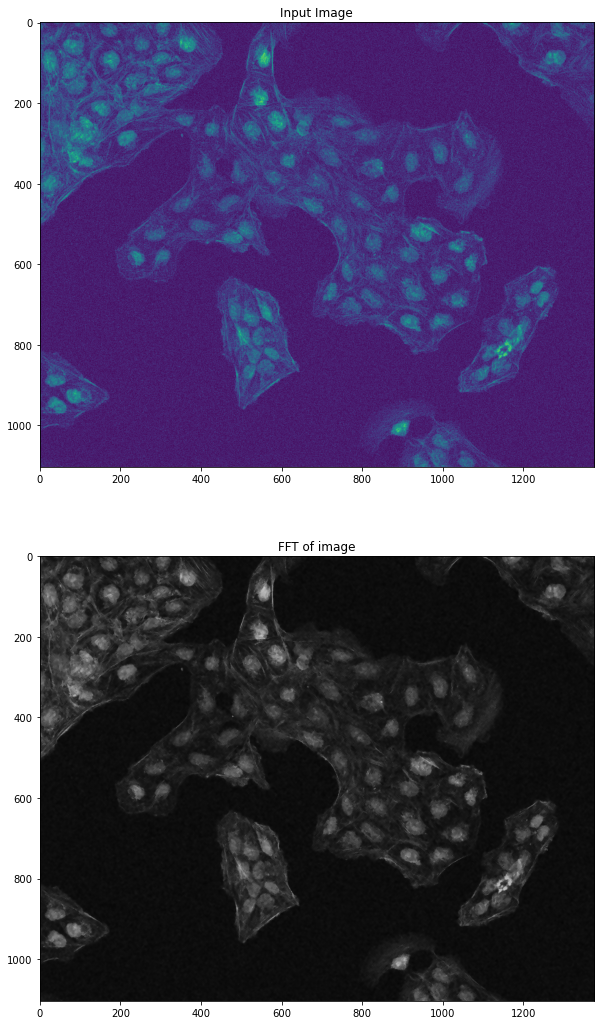

In [29]:
  fig = plt.figure(figsize=(26, 18))
  ax1 = fig.add_subplot(2,1,1)
  ax1.imshow(img)
  ax1.title.set_text('Input Image')
  ax2 = fig.add_subplot(2,1,2)
  ax2.imshow(denoise_img, cmap='gray')
  ax2.title.set_text('NLM Filtered')
  plt.show()